## Kernel methods

Author: Julian Lißner

For questions and feedback write a mail to: [lissner@mib.uni-stuttgart.de](mailto:lissner@mib.uni-stuttgart.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
from matplotlib.colors import LinearSegmentedColormap as Cmap

custom_colormap = Cmap.from_list( "", [ (0., 0.6, 0.6), (0., 0.6, 0.6), (0., 0.6, 0.6), (0.,0.5,0.8), (0.,0.5,0.8), "black", "yellow","yellow",  (1.0, 1.0, .3), (1.0, 1.0, .3), (1.0, 1.0, 0.5) ] )

## Nearest mean classifier
- is supervised machine learning
    - data given with output values
    - calibrate model parameters based on data
- linear classification
- given training data governs behaviour of model 
- model evaluated with $f(x^{\prime}) = \text{sign} \big( || x^{\prime}-m^-||^2 - || x^{\prime}-m^+||^2 \big )  $
- weights/parameters $m^{\ast}$ given as $m^+ = \frac1{n^+} \sum_{i^+} x_i \,,$ $\quad m^-$ analogue

In [3]:
resolution = (100,100) 
sample_positive = np.array( [ [20, 12], [40,15], [49,35] ] ) #output value 1
sample_negative = np.array( [ [12, 60], [22,65], [30,78] ] ) #output value -1

n_plus  = len( sample_positive)
n_minus = len( sample_negative)
m_plus  = 1/n_plus * np.sum( sample_negative, axis=0) 
m_minus = 1/n_minus * np.sum( sample_positive, axis=0) 

def evaluate_classifier( x_prime, m_minus, m_plus, classify=True):
    """ Evaluate the linear nearest mean classifier """
    activation = np.linalg.norm( x_prime - m_minus)**2 -np.linalg.norm( x_prime - m_plus)**2
    if classify is True:
        if activation < 0: 
            return -1
        else:
            return 1
    else:
        return activation

- decision boundaries can be nicely visualized by evaluation the classifier for every point
- each point is one value in the image $\blacktriangleright$ input is position of pixel in image grid

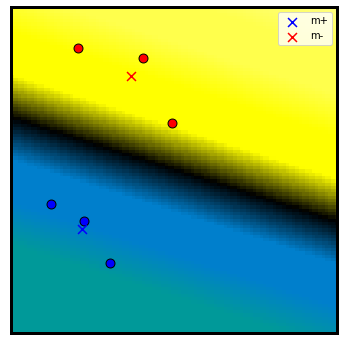

In [4]:
evaluation_matrix = np.zeros( resolution)
for i in range (resolution[0]):
    for j in range (resolution[1]):
        sample = np.array( [i,j])
        evaluation_matrix[i,j] = evaluate_classifier( sample, m_minus, m_plus, classify=False)

fig, ax = plt.subplots( figsize=(6,6))
ax.imshow( - evaluation_matrix.T, cmap=custom_colormap)
ax.scatter( sample_positive[:,0], sample_positive[:,1], facecolor='red', edgecolor='k', s=80)
ax.scatter( sample_negative[:,0], sample_negative[:,1], facecolor='blue', edgecolor='k' , s=80)
ax.scatter( *m_plus, marker='x', facecolor='blue', edgecolor='k'  , s=80, label='m+')
ax.scatter( *m_minus, marker='x', facecolor='red', edgecolor='k'   , s=80, label='m-')
ax.legend()
#ax.axis('off')
ax.set_xticks( [] )
ax.set_yticks( [] )
for side in ['right', 'left', 'top', 'bottom']:
    ax.spines[side].set_linewidth( 3)
plt.show() 

- the trained model needs to be validated<br>
$\quad\blacktriangleright$ validation data
- compute error while model calibration
- generality check of the model

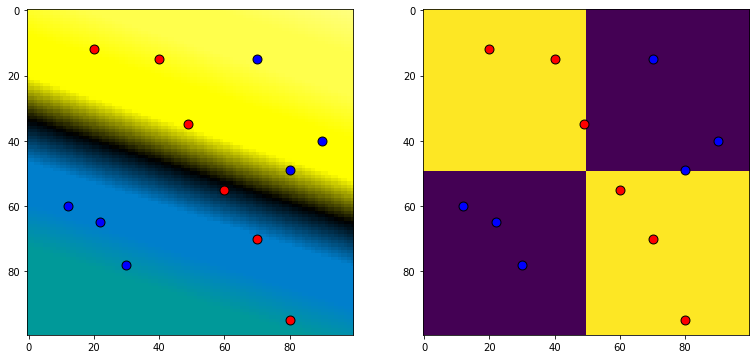

In [5]:
reference_solution = np.ones( resolution)*-1
for index in [slice( 0, resolution[0]//2), slice(resolution[0]//2, resolution[0]) ]:
    reference_solution[ index, index] = 1
valid_negative = np.array( [[ 70,15], [90,40], [80, 49]] )
valid_positive = np.array( [[ 70,70], [80,95], [60, 55]] )

fig, axes = plt.subplots( 1, 2, figsize=(13,6) )
axes[0].imshow( - evaluation_matrix.T, cmap=custom_colormap)
axes[0].scatter( sample_positive[:,0], sample_positive[:,1], facecolor='red', edgecolor='k', s=80)
axes[0].scatter( sample_negative[:,0], sample_negative[:,1], facecolor='blue', edgecolor='k' , s=80)
axes[0].scatter( valid_positive[:,0], valid_positive[:,1], facecolor='red', edgecolor='k', s=80)
axes[0].scatter( valid_negative[:,0], valid_negative[:,1], facecolor='blue', edgecolor='k' , s=80)

axes[1].imshow( reference_solution)
axes[1].scatter( sample_positive[:,0], sample_positive[:,1], facecolor='red', edgecolor='k', s=80)
axes[1].scatter( sample_negative[:,0], sample_negative[:,1], facecolor='blue', edgecolor='k' , s=80)
axes[1].scatter( valid_positive[:,0], valid_positive[:,1], facecolor='red', edgecolor='k', s=80)
axes[1].scatter( valid_negative[:,0], valid_negative[:,1], facecolor='blue', edgecolor='k' , s=80)
plt.show()

----------
## Nearest mean classification using features maps
- _features maps_ add a dimension to the data
- linear seperation in the additional dimension can yield nonlinear separation in the original domain
- general definition of the feature map  $\underline{\Phi} $
$$ \underline{\Phi}(\underline{x}) = \begin{bmatrix} x_1& x_2 & x_1^2- x_2^2 \end{bmatrix} = [ x_1 \quad x_2 \quad \hat{\Phi}(\underline{x}) ]$$
- classification is conducted via 
$$ \underline{\hat y} = \text{sign}\big( \underline{\Phi}\,(\underline{x})\,\, \underline a + \underline b \big) $$

- __Note:__ Data will be arranged row wise (each row one sample)


row wise aranged samples, data has the shape: (500, 2)
got a total of 500 samples
(500, 2) (500, 1)


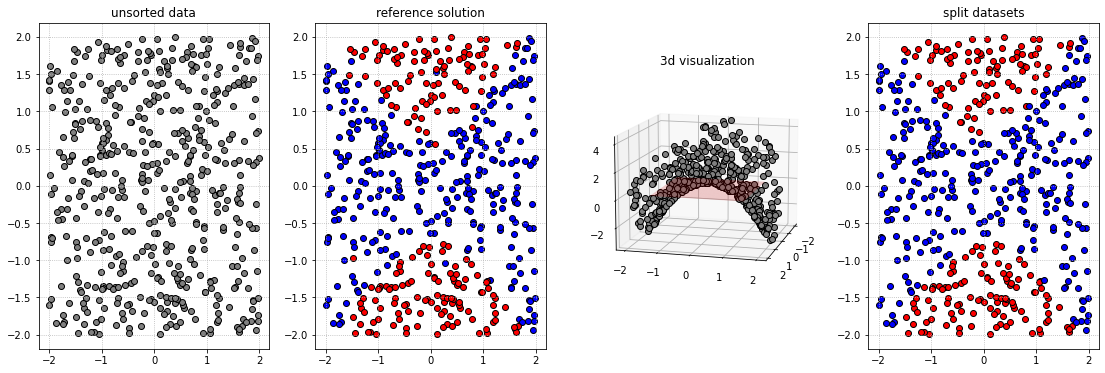

In [7]:
data = pickle.load( open( 'data/seperation_scatterdata.pkl', 'rb' ) )
x = data[0]
n_samples = x.shape[0]
print( 'row wise aranged samples, data has the shape:', x.shape)
print( 'got a total of {} samples'.format( n_samples))
x_orig = data[1]

phi_hat = lambda x:  x[:,0]**2 - x[:,1]**2

print( x.shape, phi_hat(x)[:,None].shape)
x = np.hstack( (x, phi_hat(x)[:,None] ) )

weights = np.array( [0,0,1] )
bias = 0.5 
y_hat = weights @ x.T + bias 

x_one = x[ y_hat < 0 ]
x_two = x[ y_hat >= 0 ]

xx, yy = np.meshgrid( np.arange(-1.5,1.5, 0.1), np.arange(-1.5,1.5,0.1) ) #required for 3d plot
fig, axes = plt.subplots( 1,4, figsize=(19,6) )
colors = ['blue', 'red' ]
for i in range( len( x_orig)):
    axes[1].scatter( x_orig[i][ :,0], x_orig[i] [:,1], facecolor=colors[i], edgecolor='k')
#3D plot
axes[-2] = plt.subplot( 1,4,3, projection='3d')
axes[-2].plot_surface( xx, yy, np.zeros( xx.shape), alpha=0.2, color='red' )
axes[-2].plot( x[:,0], x[:,1], y_hat, 'o', markeredgecolor='k', markerfacecolor='gray')
axes[-2].view_init( elev=12, azim=15)
titles = ['unsorted data', 'reference solution', '3d visualization', 'split datasets']

axes[0].scatter( x[:,0], x[:,1], facecolor='gray', edgecolor='k')
axes[-1].scatter( x_one[:,0], x_one[:,1], facecolor='red', edgecolor='k' )
axes[-1].scatter( x_two[:,0], x_two[:,1], facecolor='blue', edgecolor='k' )

for ax in axes:
    ax.set_title( titles.pop(0))
    ax.grid( ls=':')
plt.show() 

## Kernel nearest mean classifier
- example from [Haasdonk ML-session](http://pnp.mathematik.uni-stuttgart.de/ians/haasdonk/data/simtech/SimTech_ML_Session_Kernel_Methods.pdf)
- classification via $f(x^{\prime}) = \text{sign} \big( || \Phi(x^{\prime})-m^-||^2_{\mathcal H} - || \Phi(x^{\prime})-m^+||^2_{\mathcal H} \big )  $ <br>
- Reformulation of  $|| \Phi(x)-m^+||^2_{\mathcal H} = \langle \Phi( x), \Phi( x) \rangle_{\mathcal H} 
- 2 \langle \Phi( x), m^+\rangle_{\mathcal H} 
+ \langle m^+, m^+ \rangle_{\mathcal H}  $ <br>

- analogue to before: $m^+ = \frac1{n^+} \sum_{i^+} \Phi(x_i) $
- consequently: $ \langle \Phi( x), m^+\rangle_{\mathcal H}  = \frac1{n^+} \sum_{i^+}  \langle \Phi( x), \Phi( x_i) \rangle_{\mathcal H}  $
- and: $ \langle m^+, m^+ \rangle_{\mathcal H} = \frac1{(n^+)^2} \sum_{i^+} \sum_{j^+} \langle \Phi( x_j), \Phi( x_i) \rangle_{\mathcal H} = b^+  $
- analogue for $m^-$. Summarizing the terms yields the classification:
$$ f(x^{\prime}) = \text{sign}\big( \frac2{n^+} \sum\limits_{i^+} \underbrace{\langle \Phi( x_i), \Phi( x^{\prime}) \rangle}_{k(x, x^{\prime}) }
- \frac2{n^-} \sum\limits_{i^-} \underbrace{\langle \Phi( x_i), \Phi( x^{\prime}) \rangle}_{k(x, x^{\prime}) }  + b^- - b^+ \big) $$<br>
$\quad\blacktriangleright$ _kernel trick_
- classification for sample $x^{\prime}$: $y^{\prime} = \text{sign}( \sum_{i}a_i\cdot k(x_i,x^{\prime}) +b )$ evaluated for all training samples $x_i$

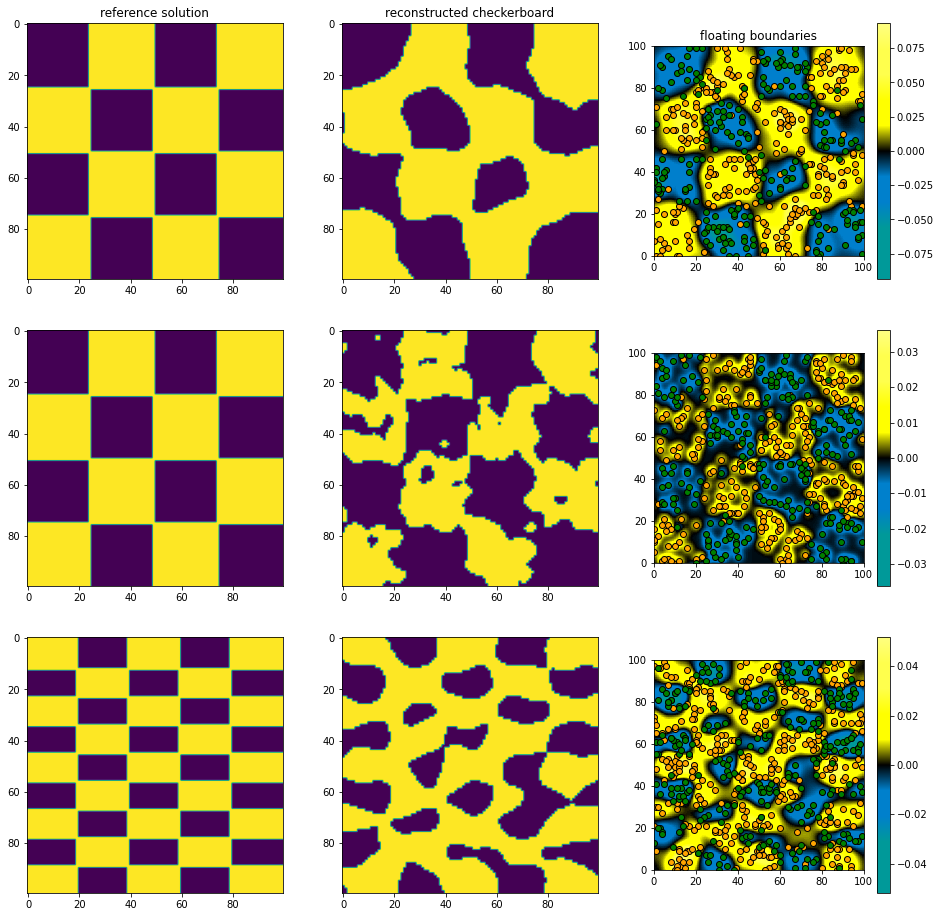

In [8]:
checkerboard_task = list( np.load( 'data/checkerboards.npz' ).values() )
fig, axes = plt.subplots( 3, 3, figsize=(16,16) )

for i in range(3):    
    x_positive = checkerboard_task[ 5*i]
    x_negative = checkerboard_task[1+5*i]
    reference_checkerboard = checkerboard_task[2+5*i]
    evaluation_matrix = checkerboard_task[ 3+5*i]
    boundaries = checkerboard_task[ 4+5*i]
    max_eval = np.max( abs( boundaries) ) 
    scaling_factor = np.array( boundaries.shape ) 
    x_plot = [ x_positive *scaling_factor, x_negative*scaling_factor] 
                                                             
    axes[i,0].imshow( np.flip(reference_checkerboard.T,0 ) )
    axes[i,1].imshow( np.flip( evaluation_matrix.T, 0)  )                              
    density = axes[i,2].imshow( boundaries.T, vmin=-max_eval, vmax=max_eval, cmap=custom_colormap ) 
    axes[i,2].scatter( x_plot[0][:,0], x_plot[0][:,1], facecolor='orange', edgecolor='k' ) 
    axes[i,2].scatter( x_plot[1][:,0], x_plot[1][:,1], facecolor='green', edgecolor='k' ) 
                    
    plt.colorbar( density, ax=axes[i,2]) 
    axes[i,2].set_xlim( xmin=0, xmax=resolution[0] ) 
    axes[i,2].set_ylim( ymin=0, ymax=resolution[1] ) 
axes[0,1].set_title( 'reconstructed checkerboard') 
axes[0,0].set_title( 'reference solution') 
_=axes[0,2].set_title( 'floating boundaries' ) 


---------
---------
## Kernel interpolation
- interpolation: fit a function to given points, function always goes through interpolation points (training data)
- kernel interpolation: have kernel functions which use given points (training data) as support points
- example kernel, Gaussian kernel: $ k(x,x^{\prime}) = \exp\big( -\gamma || x-x^{\prime}||^2 \big) $
- the coefficients $\underline w$ (model weight) are given as $\underline w = (\underline{\underline K}(\gamma)\,)^{-1} \, \underline y \quad$ <br>with $\, \underline{\underline K}(\gamma) \,\widehat =\, k( x_i, x_j; \gamma) $ for all training samples in $x$ and $y$
- the model can then be evaluated as $ \underline{\hat y}(\underline x_{\rm valid} ) = \underline{w} \, \underline{\underline{k}} ( \underline{x}, \underline x_{\rm valid}; \gamma )$
- kernel matrix is singular for two identical $x$-values
- regularization with nugget parameter: $\underline{\underline K} + \delta\underline{\underline I} $
- hyperparameters govern model performance, these are
    - kernel function
    - kernel parameters
    - nugget parameter
    - support points (regression)

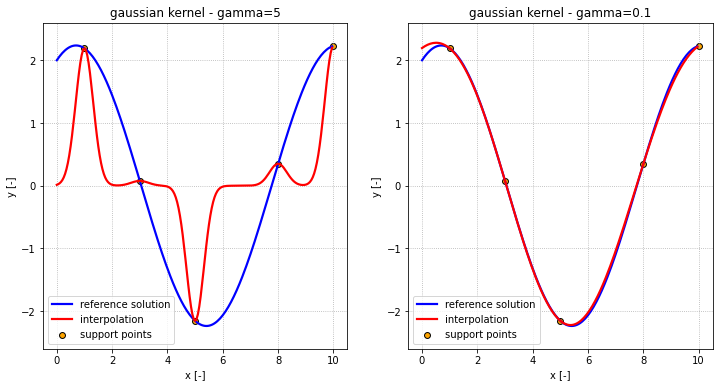

In [9]:
data = np.load( 'data/kernel_hyperparameters.npz' )
ref_style = dict( color='blue', lw=2.2, label='reference solution')
approximation_style = dict( color='red', lw=2.2, label='interpolation')
support_style = dict( facecolor='orange', edgecolor='k', s=35, label='support points' )
fig, axes = plt.subplots( 1, 2, figsize=(12,6))
axes = axes.flatten()
for ax in axes:
    ax.plot( data['x_ref'], data['y_ref'], **ref_style)
    ax.scatter( data['x_train'], data['y_train'], **support_style )
for i in range( len(axes) ):
    axes[i].plot( data['x_ref'], data['arr_{}'.format(i)], **approximation_style )

titles = [ 'gaussian kernel - gamma=5', 'gaussian kernel - gamma=0.1']
for ax in axes:
    ax.grid( ls=':', c='#AAAAAA' )
    ax.legend()
    ax.set_xlabel( 'x [-]' )
    ax.set_ylabel( 'y [-]' )
    ax.set_title( titles.pop(0) )
    ax.set_ylim( ymin=-2.6, ymax=2.6)

### Kernel Regression

- regression chooses support points $z$ to interpolate with based on training data
- regression kernel matrix $\underline{\underline L}(x, z;\gamma)\,\widehat =\, k( x_i, z_j; \gamma)$ computed from training data and support_points
- regression is generally faster to evaluate than interpolation 

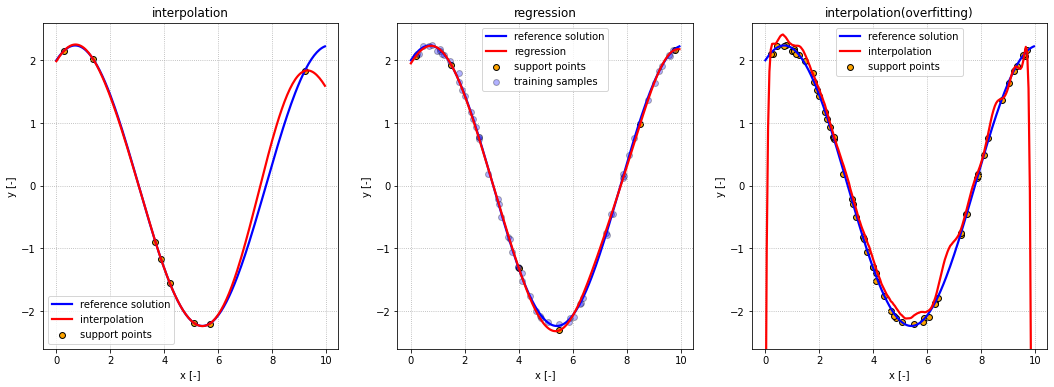

In [10]:
data = np.load( 'data/interpolation_regression.npz' ) 
ref_style = dict( color='blue', lw=2.2, label='reference solution')
approximation_style = dict( color='red', lw=2.2 )
support_style = dict( facecolor='orange', edgecolor='k', s=35, label='support points' )
regress_style = dict( facecolor='blue', edgecolor='k', alpha=0.3, s=35)
fig, axes = plt.subplots( 1, 3, figsize=(18,6) )
for ax in axes:
    ax.plot( data['x_ref'], data['y_ref'], **ref_style )
axes[0].plot( data['x_ref'], data['y_inter'], **approximation_style, label='interpolation' ) 
axes[1].plot( data['x_ref'], data['y_regress'], **approximation_style, label='regression' ) 
axes[2].plot( data['x_ref'], data['y_reg_inter'], **approximation_style, label='interpolation' )  
axes[0].scatter( data[ 'x_train_inter'],data[ 'y_train_inter'], **support_style)
axes[1].scatter( data[ 'x_support'],data[ 'y_support'], **support_style)
axes[1].scatter( data[ 'x_train_reg'],data[ 'y_train_reg'], **regress_style, label='training samples')
axes[2].scatter( data[ 'x_train_reg'],data[ 'y_train_reg'], **support_style)

titles = [ 'interpolation', 'regression', 'interpolation(overfitting)' ]
for ax in axes:
    ax.grid( ls=':', c='#AAAAAA' )
    ax.legend()
    ax.set_xlabel( 'x [-]' )
    ax.set_ylabel( 'y [-]' )
    ax.set_title( titles.pop(0) )
    ax.set_ylim( ymin=-2.6, ymax=2.6)